In [ ]:
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from sklearn.manifold import TSNE

In [2]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\PRAVEEN
[nltk_data]     ANANTH\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\PRAVEEN
[nltk_data]     ANANTH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
df_fake = pd.read_csv('Fake.csv')
df_true = pd.read_csv('True.csv')
df = pd.concat([df_fake, df_true])
df = df[['text']]  # Use only the text column
df.dropna(inplace=True)

In [4]:
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    return tokens

In [5]:
sentences = df['text'].apply(preprocess_text).tolist()

model = Word2Vec(sentences, vector_size=100, window=5, min_count=5, workers=4)

key_terms = ['data', 'government', 'election', 'science', 'technology']
for word in key_terms:
    if word in model.wv:
        print(f"\nTop 5 words similar to '{word}':")
        print(model.wv.most_similar(word, topn=5))
    else:
        print(f"'{word}' not in vocabulary.")


Top 5 words similar to 'data':
[('database', 0.7006072402000427), ('databases', 0.6745275855064392), ('statistics', 0.6704486608505249), ('census', 0.6393408179283142), ('records', 0.6080524325370789)]

Top 5 words similar to 'government':
[('governments', 0.596680223941803), ('bureaucracy', 0.5716842412948608), ('authorities', 0.48969700932502747), ('governmentin', 0.4636870324611664), ('administration', 0.46234646439552307)]

Top 5 words similar to 'election':
[('elections', 0.8542830348014832), ('electionthe', 0.7181751728057861), ('primaries', 0.6355459690093994), ('electoral', 0.6262504458427429), ('nominating', 0.5869544148445129)]

Top 5 words similar to 'science':
[('scientist', 0.6629812717437744), ('scientific', 0.654425323009491), ('geography', 0.654144823551178), ('studies', 0.6523318886756897), ('scientists', 0.6298052668571472)]

Top 5 words similar to 'technology':
[('advancements', 0.7041400074958801), ('technologies', 0.683660626411438), ('specialists', 0.681368172168

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


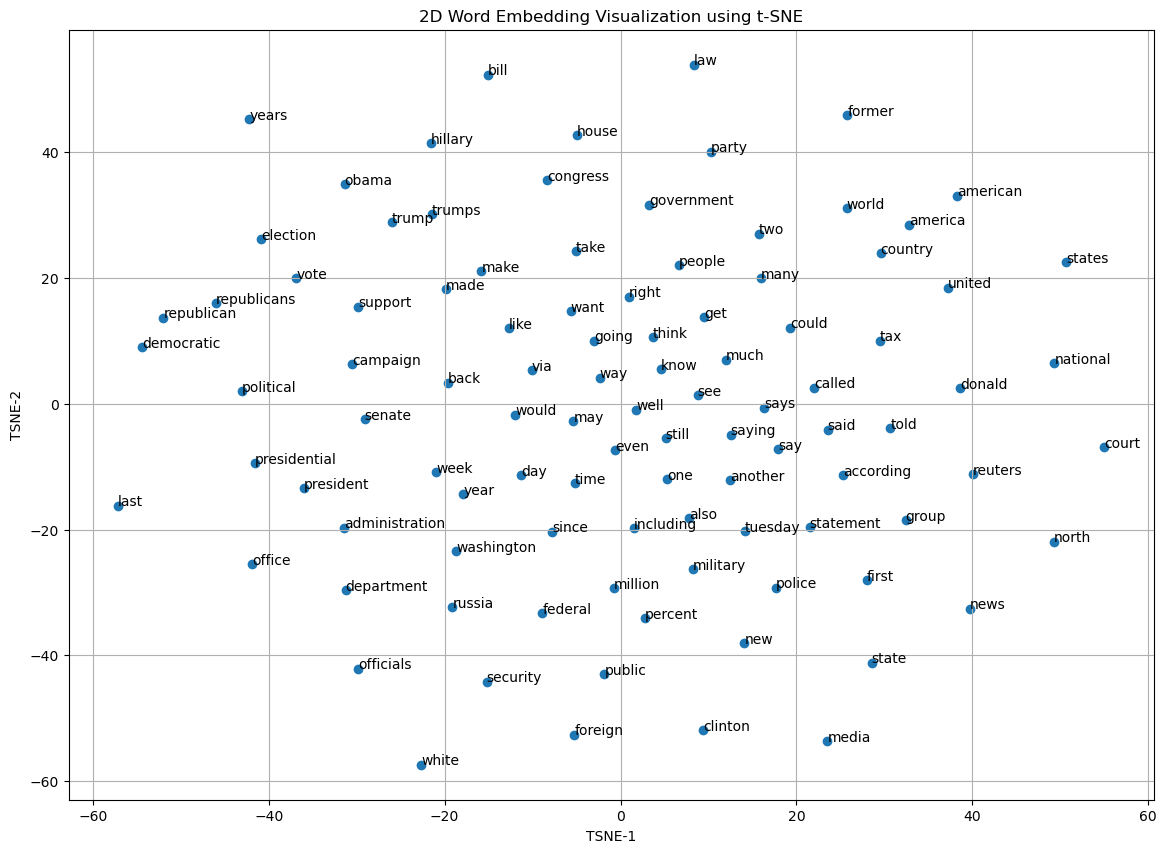

In [ ]:
words = list(model.wv.index_to_key[:100])  
word_vectors = [model.wv[word] for word in words] 

word_vectors = np.array(word_vectors)

tsne = TSNE(n_components=2, perplexity=30, n_iter=500, random_state=42)
word_vectors_2d = tsne.fit_transform(word_vectors)

plt.figure(figsize=(14, 10))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1])

for i, word in enumerate(words):
    plt.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]))

plt.title("2D Word Embedding Visualization using t-SNE")
plt.xlabel("TSNE-1")
plt.ylabel("TSNE-2")
plt.grid(True)
plt.show()